In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt
from matplotlib import cm as CM
import tensorflow as tf

unlabel_folder = "./data/unlabelled_data/"
label_folder = "./data/Labelled_data/"

# Unlabel Imgae

In [3]:
pair1_train = np.load(os.path.join(unlabel_folder,"pair1_train.npy"))
pair2_train = np.load(os.path.join(unlabel_folder,"pair2_train.npy"))

Text(0.5, 1.0, 'pair_small\nShape: (576, 320, 3)\nCount: 0.0')

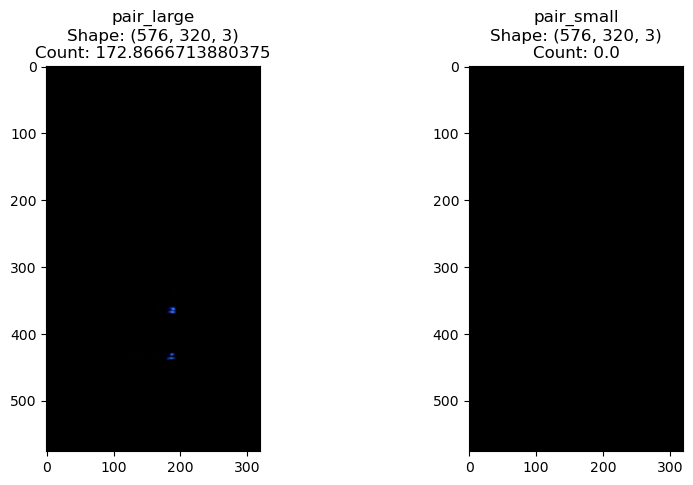

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
index = 300
large_image:np.ndarray = pair1_train[index]
small_image:np.ndarray = pair2_train[index]
axs[0].imshow(large_image)
axs[0].set_title('pair_large\nShape: {}\nCount: {}'.format(
    large_image.shape,large_image.sum()))  # 设置子图标题

axs[1].imshow(small_image)
axs[1].set_title('pair_small\nShape: {}\nCount: {}'.format(
  small_image.shape,small_image.sum()))  # 设置子图标题

# Label Image

In [2]:
x_train = np.load(os.path.join(label_folder,"x_train.npy"))
y_train = np.load(os.path.join(label_folder,"y_train.npy"))

Text(0.5, 1.0, 'density_image\nShape: (576, 320)\nCount: 319.0000051913283')

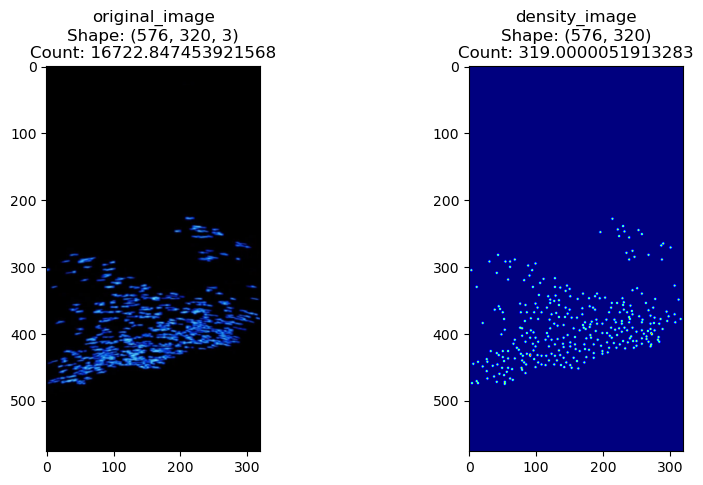

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
index = 181
original_image:np.ndarray = x_train[index]
density_image:np.ndarray = y_train[index]
axs[0].imshow(original_image)
axs[0].set_title('original_image\nShape: {}\nCount: {}'.format(
    original_image.shape,original_image.sum()))  # 设置子图标题

axs[1].imshow(density_image,cmap=CM.jet)
axs[1].set_title('density_image\nShape: {}\nCount: {}'.format(
  density_image.shape,density_image.sum()))  # 设置子图标题

# Check the Model

In [22]:
from model import *
X = np.random.randint(0,10,size=(10,576,320,3))
p1 = np.random.randint(0,10,size=(10,576,320,3))
p2 = np.random.randint(0,10,size=(10,576,320,3))

X = tf.convert_to_tensor(X,dtype = tf.float32)
p1 = tf.convert_to_tensor(p1,dtype = tf.float32)
p2 = tf.convert_to_tensor(p2,dtype = tf.float32)

model = multitask_au(input_shape = (576,320,3))

yhat,yhat_diff = model([X,p1,p2], training = True)
print(yhat.shape,yhat_diff.shape)


(10, 18, 10, 2) (10, 2)


## Check The Y_hat

1/1 [==============================] - 2s 2s/step
(1, 18, 10, 2) (1, 2)


Text(0.5, 1.0, 'density_image\nShape: (1, 18, 10, 2)\nCount: 351.54876708984375')

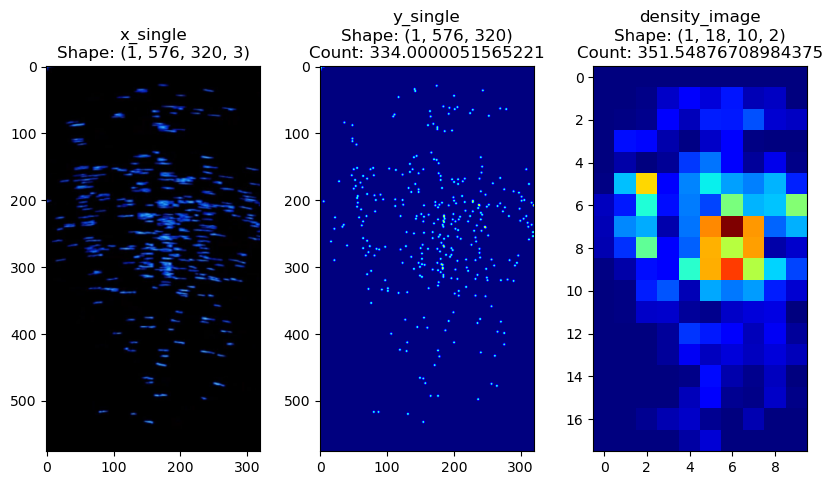

In [19]:
from model import *
model = multitask_au(input_shape = (576,320,3))
path_weights = "./data/weights_mt_au_pretrained.h5"
model.load_weights(str(path_weights))
ind = 245

x_single = tf.expand_dims(x_train[ind],axis=0)
y_single = tf.expand_dims(y_train[ind],axis=0)
pair1_single = tf.expand_dims(pair1_train[ind],axis=0)
pair2_single = tf.expand_dims(pair2_train[ind],axis=0)

density_hat, diff = model.predict([x_single, pair1_single, pair2_single])
print(density_hat.shape,diff.shape)

fig, axs = plt.subplots(1, 3, figsize=(10, 5))

axs[0].imshow(x_single[0])
axs[0].set_title('x_single\nShape: {}'.format(
    x_single.shape))  # 设置子图标题
axs[1].imshow(y_single[0],cmap=CM.jet)
axs[1].set_title('y_single\nShape: {}\nCount: {}'.format(
    y_single.shape,tf.reduce_sum(y_single)))  # 设置子图标题

axs[2].imshow(density_hat[0,:,:,0],cmap=CM.jet)
axs[2].set_title('density_image\nShape: {}\nCount: {}'.format(
  density_hat.shape,tf.reduce_sum(density_hat)))  # 设置子图标题